In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
df=pd.read_csv("AMA_PUDB_EXPORT_123113.csv")

In [7]:
df.shape

(40547, 87)

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows",1000,"display.max_columns",1000):
        display(df)
    

In [5]:
display_all(df.head())

,Year,Loan Number,FHLBankID,Program,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,LocMedY,Tractrat,Income,CurAreY,IncRat,UPB,LTV,MortDate,AcquDate,Purpose,Coop,Product,FedGuar,Term,AmorTerm,FHFBID,Seller,SellCity,SellSt,SellType,NumBor,First,CICA,BoRace,CoRace,BoGender,CoGender,BoAge,CoAge,Occup,NumUnits,Bed1,Bed2,Bed3,Bed4,Aff1,Aff2,Aff3,Aff4,Rent1,Rent2,Rent3,Rent4,RentUt1,RentUt2,RentUt3,RentUt4,Geog,Rate,Amount,Front,Back,Borrower Credit Score,Co-Borrower Credit Score,PMI,Self,PropType,ArmIndex,ArmMarg,PrepayP,BoEth,Race2,Race3,Race4,Race5,CoEth,Corace2,Corace3,Corace4,Corace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO
0,2013,1,Boston,1,8,13,14500,202560,135.06,25.33,88409,87860,1.0062,168662,93800,1.7981,236610,0.90,2013,2013,1,2,1,0,360,360,54835,General Electric Employe,Milford,CT,1,2,2,9,5,5,1,2,34,34,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0450,236610,0.1084,0.1852,5,5,0.25,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2
1,2013,2,Boston,1,9,1,14860,211129,207.00,13.83,112652,100593,1.1199,287556,106700,2.6950,600000,0.65,2013,2013,2,2,1,0,360,360,54835,General Electric Employe,Milford,CT,1,2,2,9,5,5,2,1,40,38,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,600000,0.1712,0.2705,5,5,0.00,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2
2,2013,3,Boston,1,9,1,14860,212029,506.00,8.75,183194,100593,1.8211,174432,106700,1.6348,475000,0.50,2013,2013,2,2,1,0,360,360,54835,General Electric Employe,Milford,CT,1,1,2,9,5,8,1,4,39,98,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,475000,0.2042,0.3672,2,5,0.00,2,PT01,99,99999,12/31/9999,2,6,6,6,6,5,8,8,8,8,2,1,2,2,1,2
3,2013,4,Boston,1,9,1,14860,206593,305.00,8.97,182813,100593,1.8174,156192,106700,1.4638,310000,0.35,2013,2013,2,2,1,0,360,360,54126,Darien Rowayton Bank,Darien,CT,1,2,2,9,5,5,1,2,68,66,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0338,310000,0.2036,0.2301,5,5,0.00,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2
4,2013,5,Boston,1,9,1,14860,206593,302.00,7.61,235278,100593,2.3389,207336,106700,1.9432,275000,0.32,2013,2013,2,2,1,0,180,180,54835,General Electric Employe,Milford,CT,1,2,2,9,5,5,1,2,45,44,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0288,275000,0.1626,0.2010,4,5,0.00,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2


In [46]:
display_all(df.describe())

,Year,Loan Number,Program,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,LocMedY,Tractrat,Income,CurAreY,IncRat,UPB,LTV,MortDate,AcquDate,Purpose,Coop,Product,FedGuar,Term,AmorTerm,FHFBID,SellType,NumBor,First,CICA,BoRace,CoRace,BoGender,CoGender,BoAge,CoAge,Occup,NumUnits,Bed1,Bed2,Bed3,Bed4,Aff1,Aff2,Aff3,Aff4,Rent1,Rent2,Rent3,Rent4,RentUt1,RentUt2,RentUt3,RentUt4,Geog,Rate,Amount,Front,Back,Borrower Credit Score,Co-Borrower Credit Score,PMI,Self,ArmIndex,ArmMarg,BoEth,Race2,Race3,Race4,Race5,CoEth,Corace2,Corace3,Corace4,Corace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO
count,40547.0,40547.000000,40547.000000,40547.00000,40547.000000,40547.000000,4.054700e+04,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,4.054700e+04,40547.000000,40547.000000,40547.000000,40547.000000,40547.0,40547.0,40547.000000,40547.0,40547.0,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.0,40547.0,40547.0,40547.0,40547.0,40547.0,40547.0,40547.0,4.054700e+04,4.054700e+04,4.054700e+04,4.054700e+04,4.054700e+04,4.054700e+04,4.054700e+04,4.054700e+04,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.0,40547.0,40547.000000,40547.000000,40547.000000,40547.0,40547.0,40547.000000,40547.000000,40547.000000,40547.000000,40547.000000,40547.0,40547.0,40547.000000,40547.0,40547.000000,40547.0
mean,2013.0,20274.000000,3.615089,28.05083,83.500308,39543.779737,1.077585e+09,3297.193503,11.855548,72176.185094,61704.735517,1.150295,9.873953e+04,64154.763608,1.557122,163939.433867,0.743519,2013.0,2013.0,1.611710,2.0,1.0,0.227218,304.744371,304.744371,19597.788073,1.001825,1.621205,1.873850,8.994278,5.005944,6.150073,1.284633,2.706143,52.857573,69.860088,1.021974,1.007917,98.0,98.0,98.0,98.0,2.0,2.0,2.0,2.0,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.908921,0.036572,164040.659038,0.181389,0.283087,4.396527,4.687252,0.027166,1.882581,99.0,99999.0,2.029275,5.998027,5.999975,6.0,6.0,3.160308,6.760130,6.760722,6.760747,6.760747,2.0,1.0,1.831134,2.0,1.508965,2.0
std,0.0,11705.055019,2.093353,11.08363,55.889362,27754.700603,3.099086e+09,3988.645288,12.258145,24896.669365,10041.079238,0.338560,1.062598e+05,10961.857035,1.698007,95219.071546,0.165405,0.0,0.0,0.495199,0.0,0.0,0.732204,81.168542,81.168542,16939.841445,0.060389,0.489093,0.332022,0.213875,0.673643,1.526269,0.513663,1.054754,23.185031,28.566344,0.146602,0.105403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.287726,0.005397,95247.040647,0.075428,0.094124,0.861187,0.660583,0.079527,0.321923,0.0,0.0,0.250105,0.056589,0.004966,0.0,0.0,1.453873,0.971998,0.971001,0.970969,0.970969,0.0,0.0,0.374638,0.0,1.126002,0.0
min,2013.0,1.000000,1.000000,1.00000,1.000000,29.000000,2.081000e+03,1.000000,0.340000,0.000000,39164.000000,0.000000,1.200000e+02,42200.000000,0.001700,11000.000000,0.010000,2013.0,2013.0,1.000000,2.0,1.0,0.000000,60.000000,60.000000,207.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,18.000000,1.000000,1.000000,98.0,98.0,98.0,98.0,2.0,2.0,2.0,2.0,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000,0.022500,11000.000000,0.000200,0.001000,1.000000,1.000000,0.000000,1.000000,99.0,99999.0,1.000000,2.000000,5.000000,6.0,6.0,1.000000,3.000000,5.000000,6.000000,6.000000,2.0,1.0,1.000000,2.0,1.000000,2.0
25%,2013.0,10137.500000,1.000000,19.00000,37.000000,19740.000000,5.658380e+05,107.000000,4.110000,55391.000000,54294.000000,0.934400,5.200000e+04,56400.000000,0.825950,95151.000000,0.670000,2013.0,2013.0,1.000000,2.0,1.0,0.000000,197.000000,197.000000,10130.000000,1.000000,1.000000

In [90]:
df.dtypes

Year                          int64
Loan Number                   int64
FHLBankID                    object
Program                       int64
FIPSStateCode                 int64
FIPSCountyCode                int64
MSA                           int64
FeatureID                     int64
Tract                       float64
MinPer                      float64
TraMedY                       int64
LocMedY                       int64
Tractrat                    float64
Income                        int64
CurAreY                       int64
IncRat                      float64
UPB                           int64
LTV                         float64
MortDate                      int64
AcquDate                      int64
Purpose                       int64
Coop                          int64
Product                       int64
FedGuar                       int64
Term                          int64
AmorTerm                      int64
FHFBID                        int64
Seller                      

Text(0.5,1,'Count')

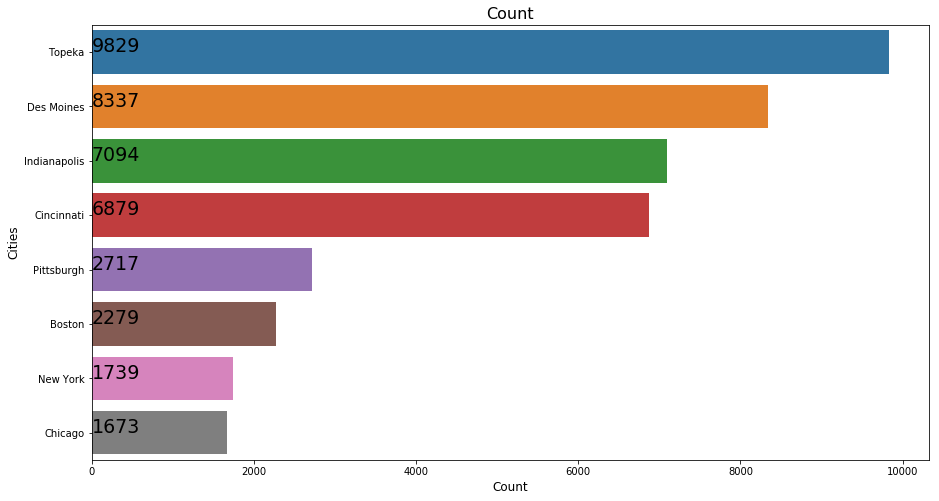

In [12]:
plt.figure(figsize=(15,8))
count = df['FHLBankID'].value_counts()
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cities', fontsize=12)
plt.title("Count", fontsize=16)

Text(0.5,1,'Borowers Gender')

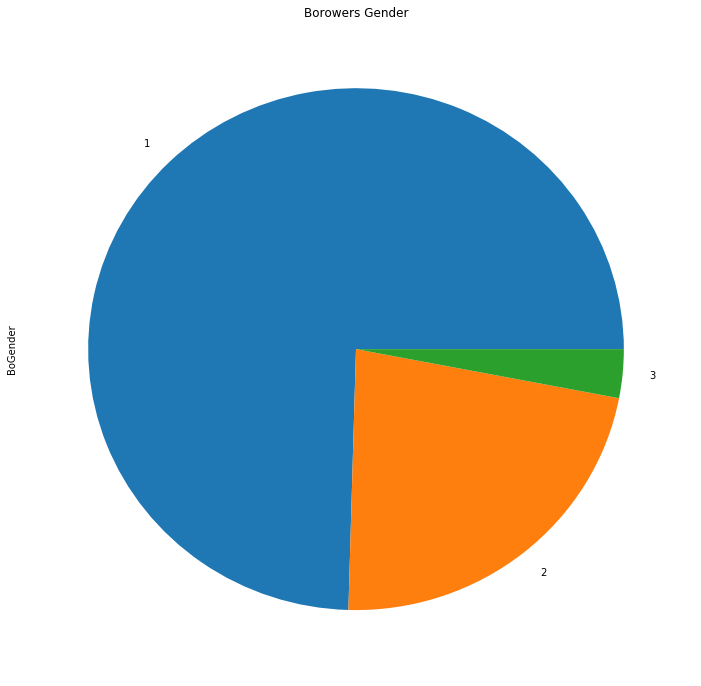

In [18]:
df["BoGender"].value_counts().plot(kind="pie", figsize=(12,12))
plt.title("Borowers Gender")

Text(0.5,1,' Co-Borowers Gender')

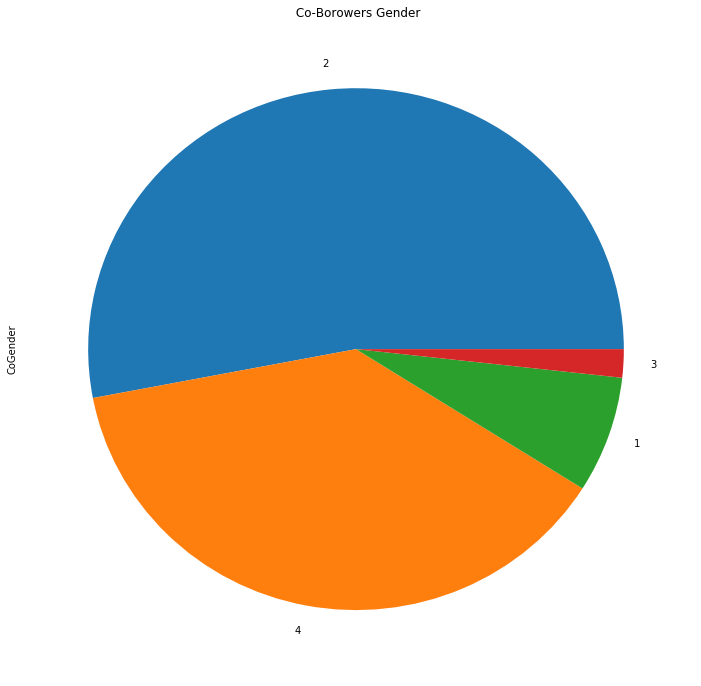

In [22]:
count=df["CoGender"].value_counts()
count.plot(kind="pie", figsize=(12,12))
plt.title(" Co-Borowers Gender")

1     5115
2    35432
Name: First, dtype: int64


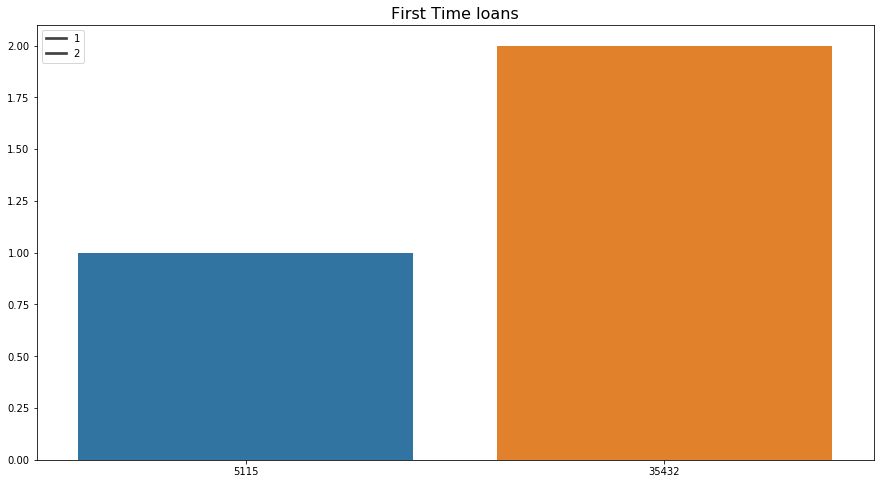

In [62]:
plt.figure(figsize=(15,8))
count = df['First'].value_counts(sort=False)
print(count)
sns.barplot(count.values, count.index, )
# plt.xlabel('', fontsize=12)
# plt.ylabel('Count', fontsize=12)
plt.title("First Time loans", fontsize=16)
plt.legend(count.index)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



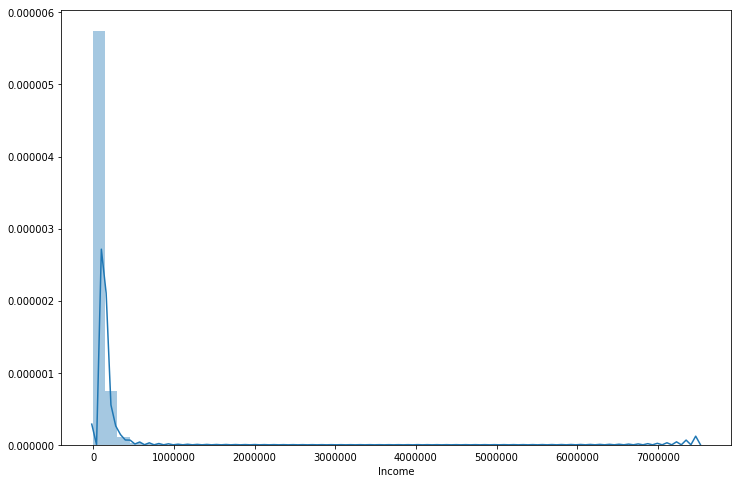

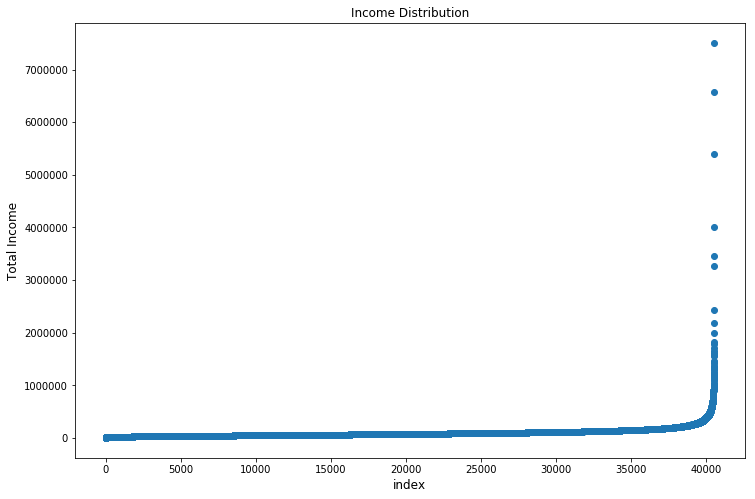

In [43]:
plt.figure(figsize = (12, 8))

sns.distplot(df['Income'])
plt.show() 
plt.figure(figsize = (12, 8))
plt.scatter(range(df.shape[0]), np.sort(df.Income.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Total Income', fontsize=12)
plt.title("Income Distribution")
plt.show()

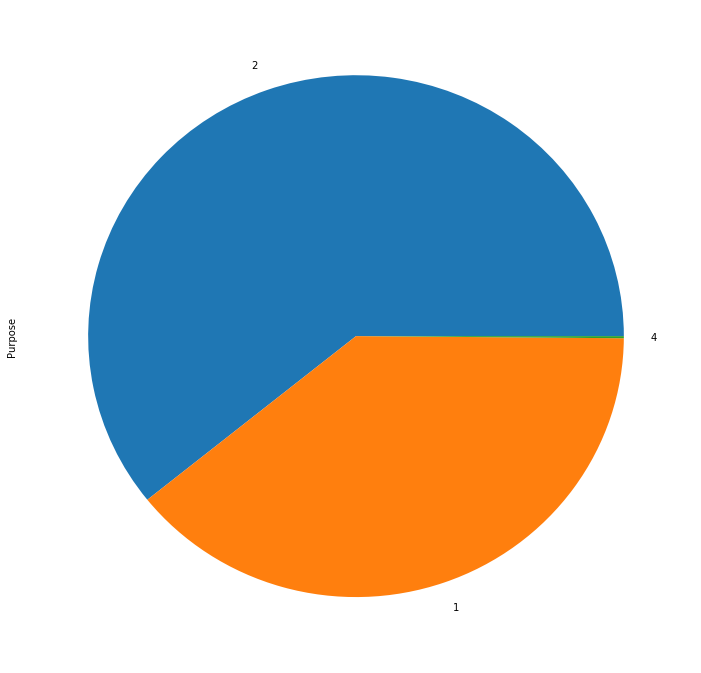

In [49]:
df['Purpose'].value_counts().plot(kind="pie",figsize=(12,12))

In [61]:
#Segregration of credit scores among Gender
pd.crosstab(df["Borrower Credit Score"],df["BoGender"],margins=True)

BoGender,1,2,3,All
Borrower Credit Score,,,,
1,190,68,13,271
2,1069,467,34,1570
3,2791,974,83,3848
4,8128,2563,288,10979
5,18049,5027,803,23879
All,30227,9099,1221,40547


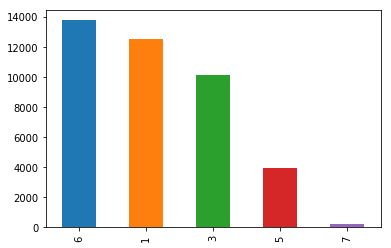

In [66]:
df['Program'].value_counts().plot(kind='bar')

In [72]:
data= pd.concat([df['Bed1'],df["Bed2"],df["Bed3"],df['Bed4']],axis=1)
data.describe()
#since all values are same this columns wont be of much importance 

,Bed1,Bed2,Bed3,Bed4
count,40547.0,40547.0,40547.0,40547.0
mean,98.0,98.0,98.0,98.0
std,0.0,0.0,0.0,0.0
min,98.0,98.0,98.0,98.0
25%,98.0,98.0,98.0,98.0
50%,98.0,98.0,98.0,98.0
75%,98.0,98.0,98.0,98.0
max,98.0,98.0,98.0,98.0


In [81]:
display_all(pd.crosstab(df["BoGender"],df["BoAge"],margins=True))

BoAge,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,93,94,99,All
BoGender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,12,49,100,166,251,353,425,472,533,580,623,713,731,721,723,719,693,641,653,660,622,624,715,685,623,598,650,596,568,583,617,592,593,612,527,549,530,498,459,383,388,395,374,346,325,326,277,260,190,178,161,158,145,110,102,71,79,57,64,43,32,25,26,14,18,17,5,2,8,4,2,1,0,0,0,4581,30227
2,0,4,18,37,56,82,152,162,179,181,172,200,173,205,198,186,184,176,180,175,154,155,176,164,179,205,172,163,170,192,169,159,209,188,197,172,170,166,167,128,132,141,104,129,98,100,104,98,91,52,50,65,54,50,43,39,26,13,15,19,12,10,12,17,5,7,3,4,8,5,0,1,2,3,1,1,1410,9099
3,0,0,0,4,2,5,7,8,11,17,20,17,19,28,32,28,29,26,31,32,25,27,22,21,20,26,26,29,31,30,22,26,23,22,27,26,27,27,22,22,28,13,10,12,18,17,14,5,10,9,9,4,3,5,3,4,2,3,2,4,2,0,2,0,1,0,2,0,1,0,0,0,1,0,0,0,220,1221
All,1,16,67,141,224,338,512,595,662,731,772,840,905,964,951,937,932,895,852,860,839,804,822,900,884,854,796,842,797,790,774,802,824,803,836,725,746,723,687,609,543,542,509,515,462,442,444,380,361,251,237,230,215,200,156,145,99,95,74,87,57,42,39,43,20,25,22,9,11,13,4,3,4,3,1,1,6211,40547


1    40510
3       37
Name: SellType, dtype: int64
2    25074
1    15423
3       37
4       12
5        1
Name: NumBor, dtype: int64


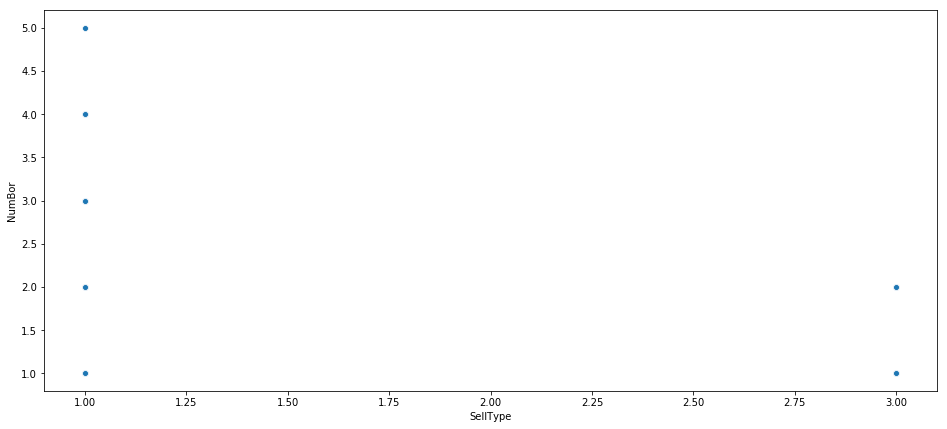

In [89]:
print(df['SellType'].value_counts())
print(df['NumBor'].value_counts())
plt.figure(figsize= (16,7))
sns.scatterplot(data=df, x="SellType", y="NumBor")
plt.show()


#We can see that people with people with sell type 3 were majority single or two borrowers

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



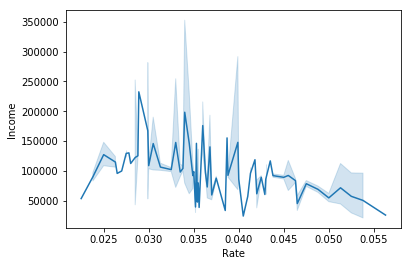

In [98]:
ax = sns.lineplot(x="Rate", y="Income", data=df)

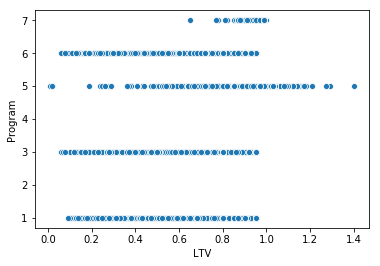

In [102]:
ax = sns.scatterplot(x="LTV", y="Program", data=df)

ValueError: plot kind 'scatter' can only be used for data frames